In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
conf_matrix_g = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:8] == 'cm_cross':
        file = os.path.join(results_path, dir)
        conf_matrix_g += np.array(pd.read_csv(file, index_col=0))

In [4]:
conf_matrix_r = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:7] == 'cm_real':
        file = os.path.join(results_path, dir)
        conf_matrix_r += np.array(pd.read_csv(file, index_col=0))

0.5666666666666667


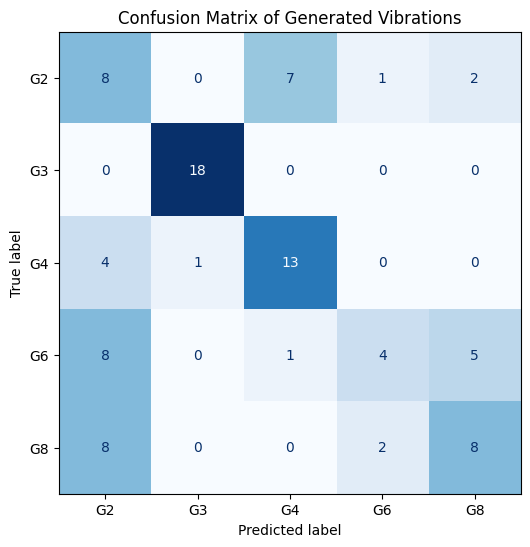

In [5]:
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_g).sum() / conf_matrix_g.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of Generated Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    values_format="d"
)

0.6666666666666666


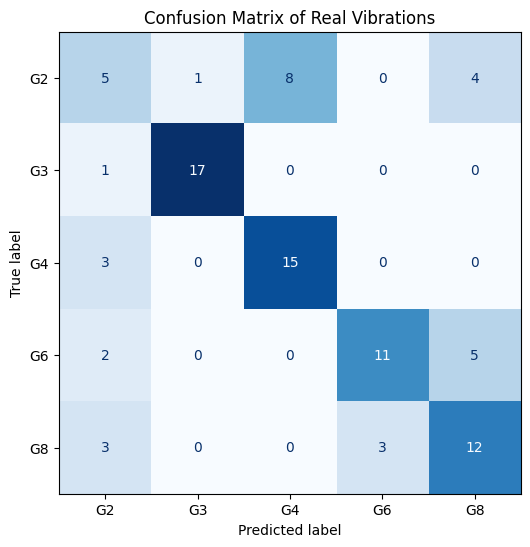

In [6]:
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_r,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_r).sum() / conf_matrix_r.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of Real Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    values_format="d"
)